Full Name: Nguyễn Hoàng Thuận

Student ID: 21521501

**Experiment Requirements (for all datasets)**
- Train - test splitting ratio = 7:3.
- Random_state = 'Your Student ID'.
- Experiment with **Gradient Descent** (*max_iter = 200*, *learning_rate (eta)* is set by yourself) and **Normal Equation**.
- Visualize the cost trend (only for Gradient Descent)
- Evaluation Metric: **R2 score**.
- After completing all requirements, click on ‘Runtime’ and choose ‘Restart and run all’.
- If the code is run without any errors (and the results are the same as before re-running), download the .ipybn file and submit. 
Otherwise, check the code carefully.


**Import Library**

In [313]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score as R2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

**Config Variables**

In [314]:
rd_state = 21521501

label_encoder = LabelEncoder()
scaler = StandardScaler()

**Linear Regression With Gradient Descent**

In [315]:
class LinearRegression_GD:
    def __init__(self, eta = 0.1, max_iter = 20, random_state = 21521501):
        self.eta = eta
        self.max_iter = max_iter
        self.random_state = random_state
        self.w = None
        self.costs = []
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs = [ ]
        for n_iters in range (self.max_iter):
            y_pred = self.predict(X)
            diff = y - y_pred
            self.w[0] += self.eta * np.mean(diff)
            self.w[1:] += self.eta * np.dot(X.T, diff) / X.shape[0]
            cost = np.mean(diff ** 2) / 2
            self.costs.append(cost)


    def predict(self, X):
        return np.dot(X, self.w[1:]) + self.w[0]

**Visualize**

In [316]:
def visualize_data(X, y):
    plt.scatter(X, y, c = 'blue', marker = 'o', s = 30)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()

In [317]:
def visualize_costs(model):
    plt.plot(range(1, len(model.costs) + 1), model.costs)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Gradient Descent')
    plt.show()

# Fish Dataset

🐟🐟 **Dataset Information (fish.csv)** 🐟🐟
- Weight: Weight of fish in gram
- Length1: Vertical length in cm
- Length2: Diagonal length in cm
- Length3: Cross length in cm
- Height: Height in cm
- Width: Diagonal width in cm

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the **weight** of fish.


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in Data Preprocessing tutorial file.

Preprocessing Data

In [318]:
df_fish = pd.read_csv('fish.csv')
df_fish.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


In [319]:
X_fish = df_fish[['Length1', 'Length2', 'Length3', 'Height', 'Width']].values
y_fish = df_fish['Weight'].values

X_fish = scaler.fit_transform(X_fish)

X_train, X_test, y_train, y_test = train_test_split(X_fish, y_fish, test_size=0.3, random_state=rd_state)
print(X_train.shape, y_train.shape)

(111, 5) (111,)


In [320]:
# visualize_data(X_train[:, 0], y_train)
# visualize_data(X_train[:, 1], y_train)
# visualize_data(X_train[:, 2], y_train)
# visualize_data(X_train[:, 3], y_train)
# visualize_data(X_train[:, 4], y_train)

Gradient Descent

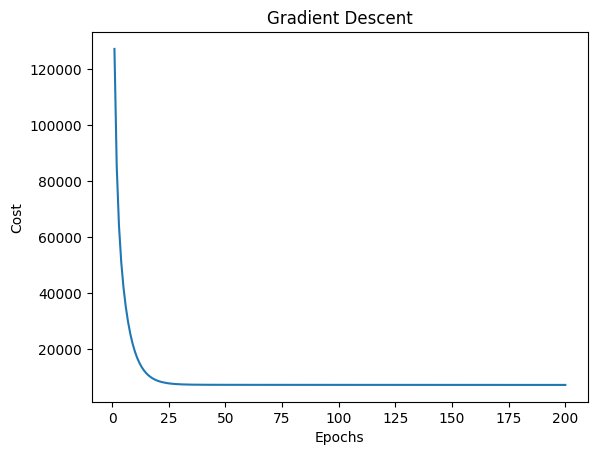

In [321]:
linear_gd = LinearRegression_GD(eta = 0.1, max_iter = 200, random_state = rd_state)
linear_gd.fit(X_train, y_train)
visualize_costs(linear_gd)

Normal Equation

In [322]:
linear_nor = LinearRegression()
linear_nor.fit(X_train, y_train)

LinearRegression()

Compare

In [323]:
y_pred = linear_gd.predict(X_test)
print('Linear With Gradient Descent - R2 score: ', R2(y_test, y_pred))
y_pred = linear_nor.predict(X_test)
print('Linear With Normal Equation - R2 score: ', R2(y_test, y_pred))

Linear With Gradient Descent - R2 score:  0.8865534013695158
Linear With Normal Equation - R2 score:  0.884855082006875


# Insurance Dataset

💰💰 **Dataset Information (insurance.csv)** 💰💰
- age: Age of primary beneficiary
- sex: Insurance contractor gender, female / male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoker / Non-smoker
- region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest
- charges: Individual medical costs billed by health insurance

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to estimate the individual medical costs billed by health insurance ('**charges**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

Preprocessing Data

In [324]:
df_insurance = pd.read_csv('insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [325]:
df_insurance['sex'] = label_encoder.fit_transform(df_insurance['sex'])
df_insurance['smoker'] = label_encoder.fit_transform(df_insurance['smoker'])
df_insurance['region'] = label_encoder.fit_transform(df_insurance['region'])

df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [326]:
X_insurance = df_insurance[['age', 'sex', 'bmi', 'children', 'smoker', 'region']].values
y_insurance = df_insurance['charges'].values

X_insurance = scaler.fit_transform(X_insurance)

X_train, X_test, y_train, y_test = train_test_split(X_insurance, y_insurance, test_size=0.3, random_state=rd_state)
print(X_train.shape, y_train.shape)

(936, 6) (936,)


Gradient Descent

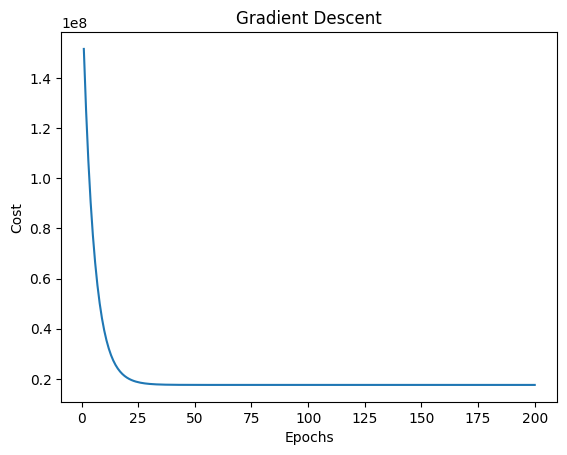

In [327]:
linear_gd = LinearRegression_GD(eta = 0.1, max_iter = 200, random_state = rd_state)
linear_gd.fit(X_train, y_train)
visualize_costs(linear_gd)

Normal Equation

In [328]:
linear_nor = LinearRegression()
linear_nor.fit(X_train, y_train)

LinearRegression()

Compare

In [329]:
y_pred = linear_gd.predict(X_test)
print('Linear With Gradient Descent - R2 score: ', R2(y_test, y_pred))
y_pred = linear_nor.predict(X_test)
print('Linear With Normal Equation - R2 score: ', R2(y_test, y_pred))

Linear With Gradient Descent - R2 score:  0.7615430908465962
Linear With Normal Equation - R2 score:  0.7615430917592668


# Tesla Stock Dataset

📈📈 **Dataset Information (tesla_stock.csv)** 📈📈
- Open: The opening price of the stock
- High: The high price of that day
- Low: The low price of that day
- Close: The closed price of that day
- Volume: The amount of stocks traded during that day

📚📚 **Problem Requirement** 📚📚

Use all remaining attributes to predict the closing price of tesla stock ('**Close**')


**Note**: Try to make the Gradient Descent achieving the comparable performance to the Normal Equation model. ✌✌

**Hint**💡: Apply (suitable) techniques in the Data Preprocessing tutorial file.

Preprocessing Data

In [330]:
df_stock = pd.read_csv('tesla_stock.csv')
df_stock.head()

df_stock.head()

,Open,High,Low,Close,Volume
0,19.000000,25.00,17.540001,23.889999,18766300
1,25.790001,30.42,23.299999,23.830000,17187100
2,25.000000,25.92,20.270000,21.959999,8218800
3,23.000000,23.10,18.709999,19.200001,5139800
4,20.000000,20.00,15.830000,16.110001,6866900


In [331]:
X_stock = df_stock[['Open', 'High', 'Low', 'Volume']].values
y_stock = df_stock['Close'].values

X_stock = scaler.fit_transform(X_stock)

X_train, X_test, y_train, y_test = train_test_split(X_stock, y_stock, test_size=0.3, random_state=rd_state)
print(X_train.shape, y_train.shape)

(1691, 4) (1691,)


Gradient Descent

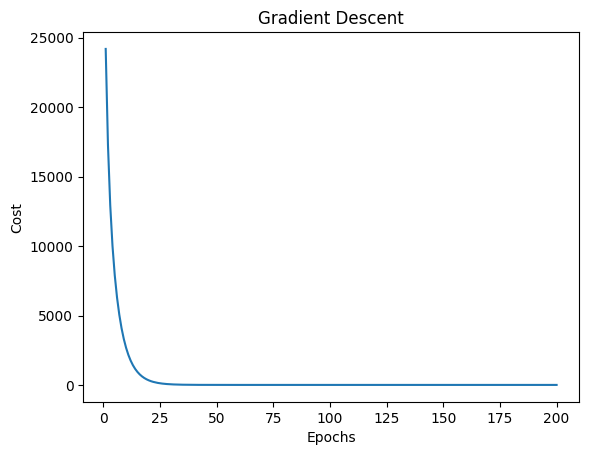

In [332]:
linear_gd = LinearRegression_GD(eta = 0.1, max_iter = 200, random_state = rd_state)
linear_gd.fit(X_train, y_train)
visualize_costs(linear_gd)

Normal Equation

In [333]:
linear_nor = LinearRegression()
linear_nor.fit(X_train, y_train)

LinearRegression()

Compare

In [334]:
y_pred = linear_gd.predict(X_test)
print('Linear With Gradient Descent - R2 score: ', R2(y_test, y_pred))
y_pred = linear_nor.predict(X_test)
print('Linear With Normal Equation - R2 score: ', R2(y_test, y_pred))

Linear With Gradient Descent - R2 score:  0.9987262145869426
Linear With Normal Equation - R2 score:  0.9997318317255124
